In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import cm

import helpers

In [2]:
# pbp = pd.concat([pd.read_csv(f'pbp_data/play_by_play_{season}.csv.gz', low_memory=False).rename(columns={'pass':'pass_'}).query('(season_type==\'REG\')&(pass_==1)') for season in range(1999,2022)])

In [3]:
# qbs = pd.DataFrame()
# span = 1300
# career_bayesian_avg_denom = 900
# season_bayesian_avg_denom = 500
# eligible_passer_ids = set(pbp.groupby(['season','passer_id'], as_index=False).agg({'play_id':'count'}).query('play_id >= 300')['passer_id'].unique())
# for season in range(1999,2022):
#     temp_qbs = pbp.loc[(pbp.season==season)&(pbp.passer_id.isin(eligible_passer_ids))].groupby(['passer_id','passer']).agg({'play_id':'count', 'epa':'mean'}).rename(columns={'play_id':'season_plays'})
#     temp_qbs['ewm'] = pbp.loc[pbp.season<=season].groupby(['passer_id','passer']).agg({'epa':lambda x: x.ewm(span=span).mean().iloc[-1]})
#     temp_qbs['career_epa'] = pbp.loc[pbp.season<=season].groupby(['passer_id','passer']).agg({'epa':'mean'})
#     temp_qbs['career_plays'] = pbp.loc[pbp.season<=season].groupby(['passer_id','passer']).agg({'play_id':'count'})
        
#     temp_qbs['season'] = season
#     qbs = pd.concat([qbs, temp_qbs.reset_index()])

# lance = pbp.loc[pbp.passer=='T.Lance'].groupby(['passer_id','passer']).agg({'play_id':'count', 'epa':'mean'}).rename(columns={'play_id':'season_plays'})
# lance['ewm'] = pbp.loc[pbp.season<=season].groupby(['passer_id','passer']).agg({'epa':lambda x: x.ewm(span=span).mean().iloc[-1]})
# lance['career_epa'] = pbp.loc[pbp.season<=season].groupby(['passer_id','passer']).agg({'epa':'mean'})
# lance['career_plays'] = pbp.loc[pbp.season<=season].groupby(['passer_id','passer']).agg({'play_id':'count'})

# lance['bayesian_epa'] = (lance['season_plays']*lance['ewm']+season_bayesian_avg_denom*temp_qbs.loc[temp_qbs.season_plays>=300]['epa'].mean())/(lance['season_plays']+season_bayesian_avg_denom)
# lance['bayesian_career_epa'] = (lance['career_plays']*lance['career_epa']+career_bayesian_avg_denom*temp_qbs.loc[temp_qbs.season_plays>=300]['career_epa'].mean())/(lance['career_plays']+career_bayesian_avg_denom)
# lance['bayesian_ewm'] = (lance['career_plays']*lance['ewm']+career_bayesian_avg_denom*temp_qbs.loc[temp_qbs.season_plays>=300]['ewm'].mean())/(lance['career_plays']+career_bayesian_avg_denom)

# lance['season'] = 2021
# qbs = pd.concat([qbs, lance.reset_index()])

# season_epa_avgs = helpers.weighted_avg(qbs, 'epa', 'season_plays', 'season')
# career_epa_avgs = helpers.weighted_avg(qbs, 'career_epa', 'career_plays', 'season')
# ewm_avgs = helpers.weighted_avg(qbs, 'ewm', 'career_plays', 'season')

# qbs['bayesian_epa'] = (qbs['season_plays']*qbs['ewm']+season_bayesian_avg_denom*qbs['season'].map(season_epa_avgs))/(qbs['season_plays']+season_bayesian_avg_denom)
# qbs['bayesian_career_epa'] = (qbs['career_plays']*qbs['career_epa']+career_bayesian_avg_denom*qbs['season'].map(career_epa_avgs))/(qbs['career_plays']+career_bayesian_avg_denom)
# qbs['bayesian_ewm'] = (qbs['career_plays']*qbs['ewm']+career_bayesian_avg_denom*qbs['season'].map(ewm_avgs))/(qbs['career_plays']+career_bayesian_avg_denom)

In [4]:
# qbs['bayesian_career_blend'] = (qbs['bayesian_career_epa'] + qbs['bayesian_ewm'])/2

In [5]:
# qbs['bayesian_career_percentile'] = qbs['bayesian_career_epa'].rank(pct=True).apply(helpers.pctile_format)
# qbs['bayesian_career_blend_percentile'] = qbs['bayesian_career_blend'].rank(pct=True).apply(helpers.pctile_format)

# qbs['last_season'] = qbs.groupby('passer_id')['season'].transform('max')
# qbs['first_season'] = qbs.groupby('passer_id')['season'].transform('min')
# qbs['season_rank'] = qbs.groupby('season')['bayesian_career_blend'].rank(ascending=False).apply(helpers.to_ordinal)

In [6]:
# qbs.to_csv('qb_bayesian_averages.csv')

In [7]:
qbs = pd.read_csv('qb_bayesian_averages.csv').drop(columns=['Unnamed: 0'])

In [8]:
starters_22 = ['A.Rodgers','P.Mahomes','T.Brady','T.Lance','J.Herbert','J.Allen','D.Prescott','L.Jackson','M.Stafford','J.Burrow','R.Wilson','K.Cousins','R.Tannehill','M.Jones','K.Murray','M.Ryan','G.Smith','M.Trubisky','J.Hurts','D.Carr','J.Brissett','T.Tagovailoa','C.Wentz','M.Mariota','J.Goff','J.Fields','D.Mills','D.Jones','T.Lawrence','Z.Wilson','B.Mayfield','S.Darnold','J.Winston','D.Lock']
filter_ = ((qbs.season==qbs.last_season)&(qbs.passer.isin(starters_22))&(qbs.passer_id!='00-0020608'))
qbs.loc[filter_]\
    [['season','passer','epa','bayesian_career_epa','bayesian_ewm','bayesian_career_blend','bayesian_career_blend_percentile','career_plays']]\
    [['passer','bayesian_career_blend','bayesian_career_blend_percentile','career_plays']]\
    .sort_values('bayesian_career_blend', ascending=False)\
    .rename(columns={'bayesian_career_blend_percentile':'Percentile','bayesian_career_blend':'Projected EPA/p', 'passer':'QB', 'career_plays':'Career dropbacks'})\
    .set_index(np.arange(1,len(qbs.loc[filter_])+1))\
    .style.background_gradient(subset=['Projected EPA/p'], cmap=cm.get_cmap('PRGn'), vmin=qbs['bayesian_career_blend'].min(), vmax=qbs['bayesian_career_blend'].max())

,QB,Projected EPA/p,Percentile,Career dropbacks
1,A.Rodgers,0.229027,99th,8541
2,P.Mahomes,0.213534,98th,2778
3,T.Brady,0.194791,97th,12677
4,J.Herbert,0.140640,93rd,1475
5,J.Allen,0.138799,92nd,2433
6,D.Prescott,0.128198,90th,3418
7,L.Jackson,0.124885,90th,1664
8,J.Burrow,0.122612,89th,1094
9,M.Stafford,0.120957,89th,7805
10,R.Wilson,0.116821,88th,5942


In [9]:
rookies = qbs.groupby(['passer_id','passer']).agg({'bayesian_career_blend':['first',lambda x:x[1:].max(),'last'], 'epa':['first', lambda x:x.iloc[1] if len(x)>1 else np.nan], 'season':['first','last'], 'season_plays':['first', lambda x:x.iloc[1] if len(x)>1 else np.nan]})
rookies.columns = ['projection_after_first_season','post_rookie_peak_projection','last_projection','first_season_epa','second_season_epa','first_season','last_season','first_season_plays', 'second_season_plays']
rookies.reset_index(inplace=True)

In [15]:
sns.set(rc={'figure.figsize':(24,8.27)})

Text(0, 0.5, 'Highest EPA Projection in (post-rookie season) career')

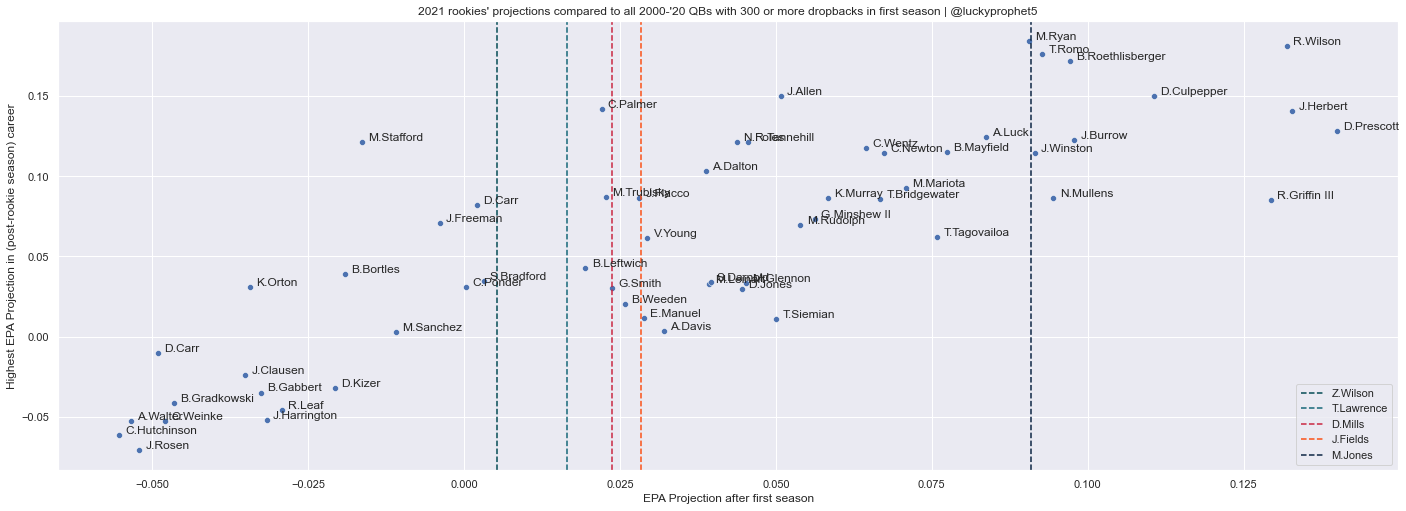

In [16]:
ax = plt.subplot()
sns.scatterplot(data=rookies.loc[(~rookies.first_season.isin([1999,2021]))&(rookies.first_season_plays>=300)], x='projection_after_first_season', y='post_rookie_peak_projection')

COLORS = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#93E9BE','DEN':'#FB4F14','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'black','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#014A53','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#B3995D','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

for name,team in {'Z.Wilson':'NYJ','T.Lawrence':'JAX','D.Mills':'HOU','J.Fields':'CIN','M.Jones':'NE'}.items():
    ax.axvline(rookies.loc[rookies.passer==name].iloc[0]['projection_after_first_season'], linestyle='--', color=COLORS[team], label=name)

ax.legend(loc='lower right')
helpers.label_plot(rookies.loc[(~rookies.first_season.isin([1999,2021]))&(rookies.first_season_plays>=300)], 'projection_after_first_season', 'post_rookie_peak_projection', 'passer', x_offset=.001, y_offset=.001)
ax.set_title("2021 rookies' projections compared to all 2000-'20 QBs with 300 or more dropbacks in first season | @luckyprophet5")
ax.set_xlabel("EPA Projection after first season")
ax.set_ylabel("Highest EPA Projection in (post-rookie season) career")

In [12]:
qbs.loc[qbs.passer=='R.Wilson']\
    [['season','passer', 'epa', 'career_epa', 'bayesian_career_blend', 'bayesian_career_blend_percentile', 'season_rank', 'season_plays', 'career_plays']]\
    .sort_values('season', ascending=True)\
    .rename(columns={'season':'Season','passer':'QB','epa':'Season EPA','career_epa':'Career EPA','bayesian_career_blend':'Projection after season','bayesian_career_blend_percentile':'Projection Percentile','season_rank':'Season rank (projection)', 'season_plays':'Season play count', 'career_plays':'Career play count'})\
    .reset_index(drop=True)\
    .style.background_gradient(subset=['Projection after season'], cmap=cm.get_cmap('PRGn'), vmin=qbs['bayesian_career_blend'].min(), vmax=qbs['bayesian_career_blend'].max())

,Season,QB,Season EPA,Career EPA,Projection after season,Projection Percentile,Season rank (projection),Season play count,Career play count
0,2012,R.Wilson,0.211273,0.211273,0.131895,91st,7th,510,510
1,2013,R.Wilson,0.178607,0.194580,0.145210,93rd,6th,533,1043
2,2014,R.Wilson,0.138402,0.174750,0.135570,92nd,8th,569,1612
3,2015,R.Wilson,0.249956,0.195323,0.181075,96th,1st,607,2219
4,2016,R.Wilson,0.091906,0.171726,0.141165,93rd,7th,656,2875
5,2017,R.Wilson,0.064847,0.150726,0.108436,86th,10th,703,3578
6,2018,R.Wilson,0.208790,0.158279,0.144469,93rd,8th,535,4113
7,2019,R.Wilson,0.123562,0.153516,0.130448,91st,10th,654,4767
8,2020,R.Wilson,0.164268,0.154881,0.138316,92nd,10th,693,5460
9,2021,R.Wilson,0.060482,0.147223,0.116821,88th,11th,482,5942


In [13]:
qbs.loc[qbs.passer=='D.Prescott']\
    [['season','passer', 'epa', 'career_epa', 'bayesian_career_blend', 'bayesian_career_blend_percentile', 'season_rank', 'season_plays', 'career_plays']]\
    .sort_values('season', ascending=True)\
    .rename(columns={'season':'Season','passer':'QB','epa':'Season EPA','career_epa':'Career EPA','bayesian_career_blend':'Projection after season','bayesian_career_blend_percentile':'Projection Percentile','season_rank':'Season rank (projection)', 'season_plays':'Season play count', 'career_plays':'Career play count'})\
    .reset_index(drop=True)\
    .style.background_gradient(subset=['Projection after season'], cmap=cm.get_cmap('PRGn'), vmin=qbs['bayesian_career_blend'].min(), vmax=qbs['bayesian_career_blend'].max())

,Season,QB,Season EPA,Career EPA,Projection after season,Projection Percentile,Season rank (projection),Season play count,Career play count
0,2016,D.Prescott,0.242959,0.242959,0.139940,92nd,8th,538,538
1,2017,D.Prescott,-0.002603,0.113184,0.077933,75th,16th,603,1141
2,2018,D.Prescott,0.053624,0.091504,0.080403,76th,18th,653,1794
3,2019,D.Prescott,0.192331,0.119158,0.115194,87th,12th,678,2472
4,2020,D.Prescott,0.113777,0.118671,0.117663,88th,16th,246,2718
5,2021,D.Prescott,0.164511,0.128059,0.128198,90th,7th,700,3418


In [14]:
_, corr, pred = helpers.year_to_year_corr(['epa','ewm','career_epa','bayesian_epa','bayesian_career_epa','bayesian_ewm','bayesian_career_blend'], 'passer', qbs.loc[qbs.season_plays>=300])
(pred**2)[['epa']]\
    .sort_values('epa',ascending=False)\
    .reset_index()\
    .replace({
        'prev_bayesian_career_blend':'Blend (Bayesian career EPA + Bayesian EWM)',
        'prev_bayesian_career_epa':'Bayesian avg, career EPA',
        'prev_bayesian_ewm':'Bayesian avg, EWM',
        'prev_ewm':'1300 dropback exp. weighted moving avg (EWM)',
        'prev_bayesian_epa':'Bayesian avg, season EPA',
        'prev_career_epa':'Career EPA',
        'prev_epa':'Season EPA'
    })\
    .rename(columns={'epa':'R-squared with season n+1 EPA', 'index':'Predictor'})\
    .style.background_gradient()

,Predictor,R-squared with season n+1 EPA
0,Blend (Bayesian career EPA + Bayesian EWM),0.263229
1,"Bayesian avg, career EPA",0.251256
2,"Bayesian avg, EWM",0.246252
3,1300 dropback exp. weighted moving avg (EWM),0.237937
4,"Bayesian avg, season EPA",0.231692
5,Career EPA,0.231501
6,Season EPA,0.198168
